In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def legendre_poly(n , x):
    if n== 0:
        return 1
    elif n==1:
        return np.cos(x)
    elif n==2:
        return 1/2*(3*np.cos(x)**2-1)
    elif n==3:
        return 1/2*(5*np.cos(x)**3-3*np.cos(x))
    elif n==4:
        return 1/8*(35*np.cos(x)**4 - 30*np.cos(x)**2 + 3)
    elif n==5:
        return 1/8*(63*np.cos(x)**5-70*np.cos(x)**3+15*np.cos(x))

In [4]:
def legendre_poly_prime(n, x):
    if n== 0:
        return 0
    elif n==1:
        return 1
    elif n==2:
        return 1/2*3*2*np.cos(x)
    elif n==3:
        return 1/2 *(-3 + 3*5*np.cos(x)**2)
    elif n==4:
        return 1/8*(-2*30*np.cos(x) + 35*4*np.cos(x)**3)
    elif n==5:
        return 1/8*(63*5*np.cos(x)**4-70*3*np.cos(x)**2+15)

In [5]:
def field_polar(r, theta, n, B):
    u_r = 0
    for i in range(1, n+1):
        u_r +=  (i+1)* legendre_poly(i , theta)/r**(i+2)*(r**2/a**2-1)*B[i-1]
        
    u_theta = 0
    for i in range(1, n+1):
        u_theta += np.sin(theta)*legendre_poly_prime(i, theta)*((i-2)/(i*a**2*r**i)-1/(r**(i+2)))*B[i-1]
        
    u_size = np.sqrt(u_r**2 + u_theta**2)
    return u_r, u_theta, u_size


def field_polar_lab(r, theta, n , B):
    u_r = -4*np.cos(theta)/(3*r**3)*B[0] 
    for i in range(2, n+1):
        u_r+= (i+1)*legendre_poly(i, theta)/(r**(i+2)) * (r**2/a**2 -1) * B[i-1]
        
    u_theta=-2*np.sin(theta)/(3*r**3)*B[0]
    for i in range(2, n+1):
        u_theta += np.sin(theta)*legendre_poly_prime(i, theta)*((i-2)/(i*a**2*r**i) - 1/(r**(i+2))) * B[i-1]
    return u_r, u_theta    

In [6]:
def field_car(r, theta, n, B):
    u_r, u_theta, u_size =field_polar(r, theta, n, B)
    u_z = np.cos(theta) * u_r - np.sin(theta) * u_theta
    u_y = u_r*np.sin(theta) + u_theta*np.cos(theta)
    return u_y, u_z, u_size


def field_car_lab(r, theta, n, B):
    u_r, u_theta=field_polar_lab(r, theta, n, B)
    u_z = np.cos(theta) * u_r - np.sin(theta) * u_theta
    u_y = u_r*np.sin(theta) + u_theta*np.cos(theta)
    return u_y, u_z

In [18]:
a = 2
B1 = 1
B2 = 0
B3 = 0
B4 = 0
B = np.array([B1, B2, B3, B4])

z = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
Z, Y = np.meshgrid(z, y)
R = np.sqrt(Z**2 + Y**2)
Theta = np.arctan(Y/Z)

#r = np.linspace(1.1, 10, 30)
#theta = np.linspace(0, 2*np.pi, 50)
#R, Theta = np.meshgrid(r, theta)
#z = R*np.cos(Theta)
#y = R*np.sin(Theta)

u_y, u_z, u_size = field_car(R, Theta, 4, B)
u_y, u_z= field_car_lab(R, Theta, 4, B)
u_y[np.where(R<a)]=0
u_z[np.where(R<a)]=0

Text(0.5, 1.0, 'Mode B03. Lab frame')

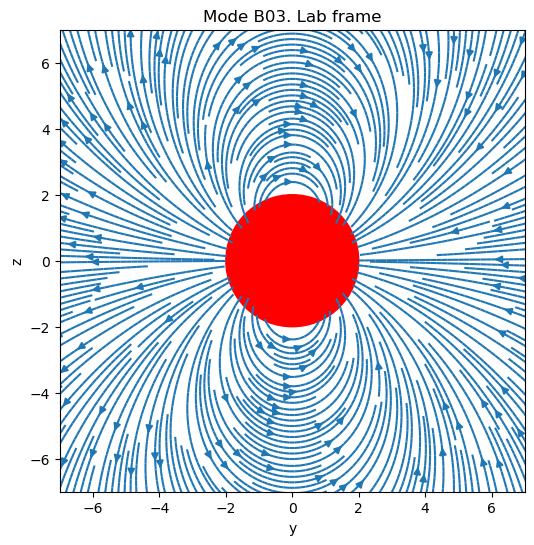

In [19]:
circle1 = plt.Circle((0, 0), 2, color='r')

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim([-7, 7])
ax.set_ylim([-7, 7])


"""
u_r = -4*np.cos(Theta)/(3*R**3)
u_t = -2*np.sin(Theta)/(3*R**3)
"""
#u_r=4*legendre_poly(3, Theta)/(R**(4)) * (R**2/a**2-1)
#u_t = np.sin(Theta)*legendre_poly_prime(3, Theta)*(1/(3*a**2*R**3)-1/R**5)
#u_z = np.cos(Theta) * u_r - np.sin(Theta) * u_t
#u_y = u_r*np.sin(Theta) + u_t*np.cos(Theta)




skip = (slice(None, None, 2), slice(None, None, 3))
#plt.quiver(Z[skip], Y[skip], u_z[skip], u_y[skip])
ax.streamplot(Z, Y, u_z, u_y, density = 4)


ax.add_patch(circle1)

plt.xlabel("y")
plt.ylabel("z")
plt.title("Mode B03. Lab frame")